# Experiment 2 - Internal variable growth

### Read the data from csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("exp2_internal_variable_growth_data500.csv")

print("Experiment data analysis - Internal variable growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDAs by sample:", df["n_network"].max())
print("Number of RDDs by RDDA:", df["n_rdds"][0])
print("Range of internal variables:", df["n_variables"].min(),"-", df["n_variables"].max())
print("Number of Coupling Signals:", df["n_coupling_signals"][0])
df.head(20)

Experiment data analysis - Internal variable growth
Number of samples: 500
Number of RDDAs by sample: 8
Number of RDDs by RDDA: 5
Range of internal variables: 3 - 10
Number of Coupling Signals: 2


,n_sample,n_network,n_rdds,n_variables,n_coupling_signals,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,5,3,2,41,2.920534,319,0.111277,24,0.693523
1,1,2,5,4,2,33,1.045145,190,0.062753,3,0.085217
2,1,3,5,5,2,61,1.351186,641,0.169470,24,0.406346
3,1,4,5,6,2,47,1.429605,347,0.111200,14,0.225228
4,1,5,5,7,2,44,1.330131,341,0.099703,4,0.106822
5,1,6,5,8,2,68,1.796513,849,0.254388,176,3.145565
6,1,7,5,9,2,79,1.939777,1110,0.289238,116,3.793180
7,1,8,5,10,2,51,1.682165,430,0.117820,22,0.274483
8,2,1,5,3,2,25,0.640236,121,0.045526,2,0.029146
9,2,2,5,4,2,65,1.170712,472,0.126448,54,2.029557


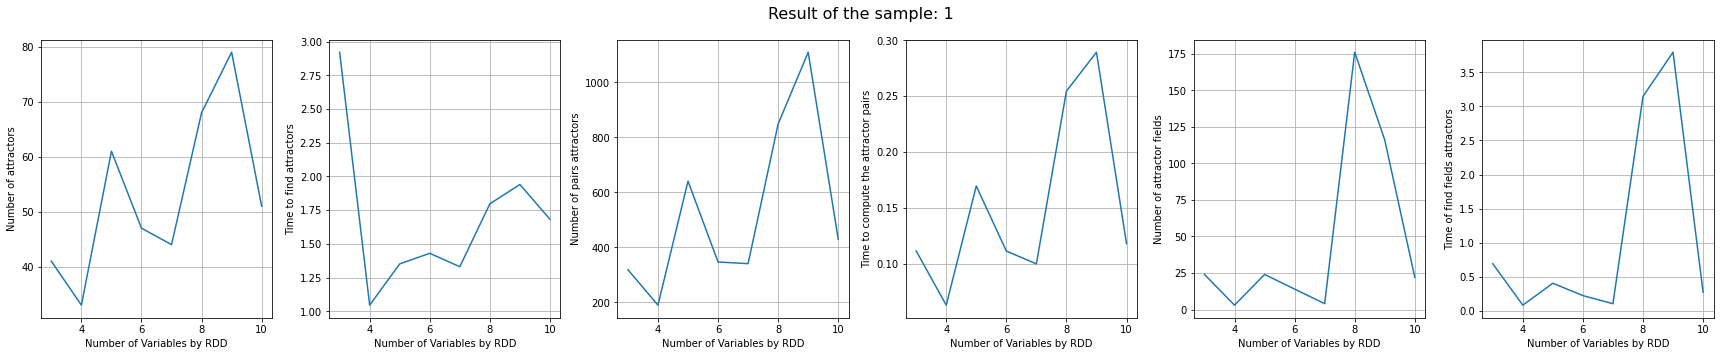

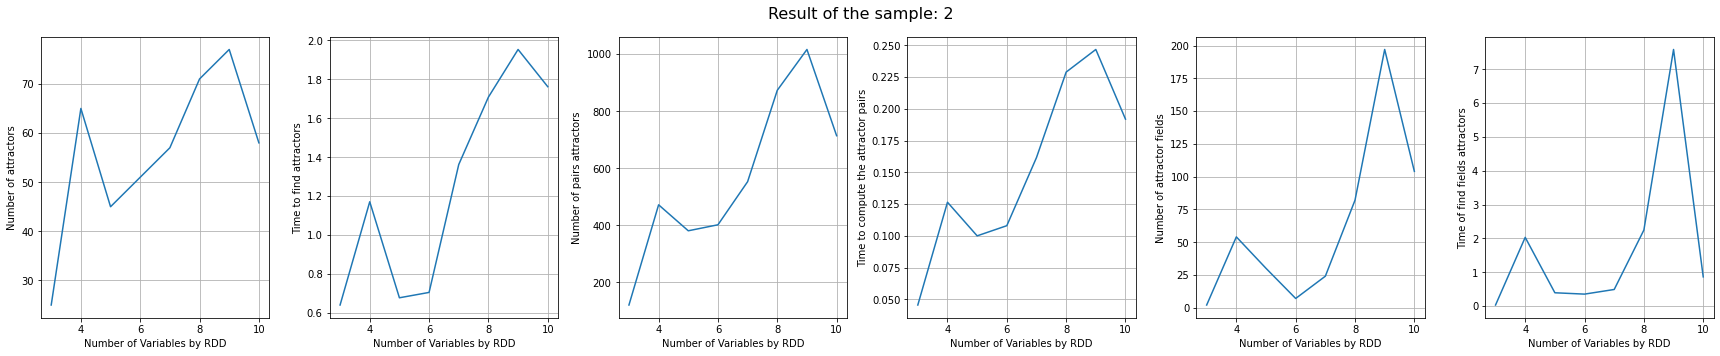

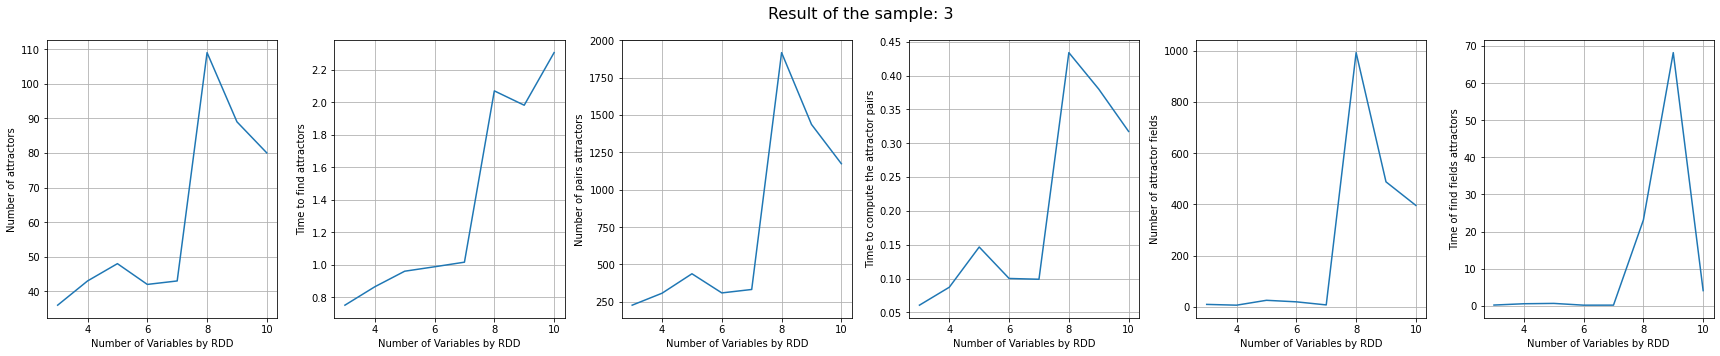

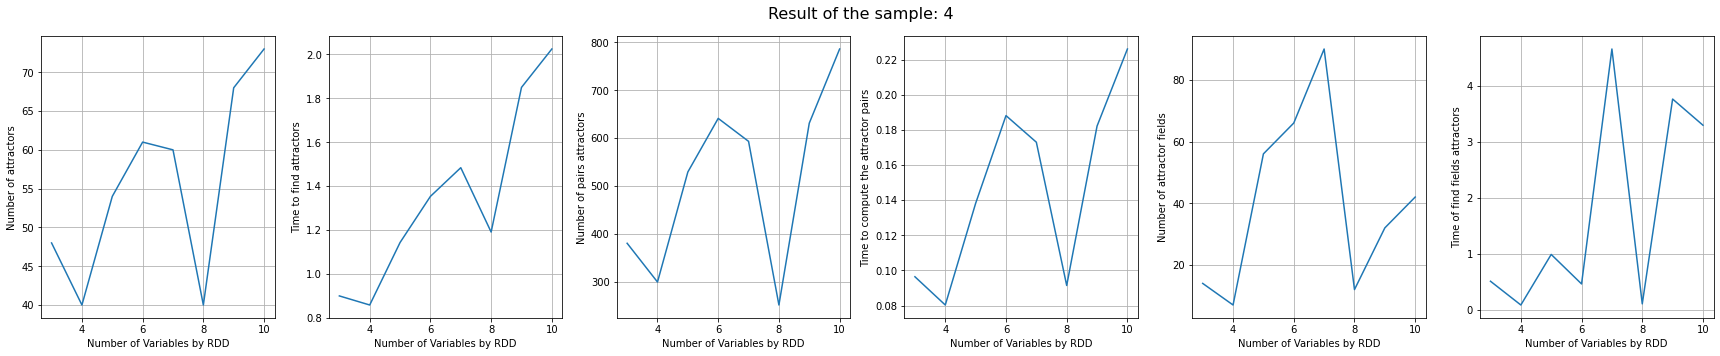

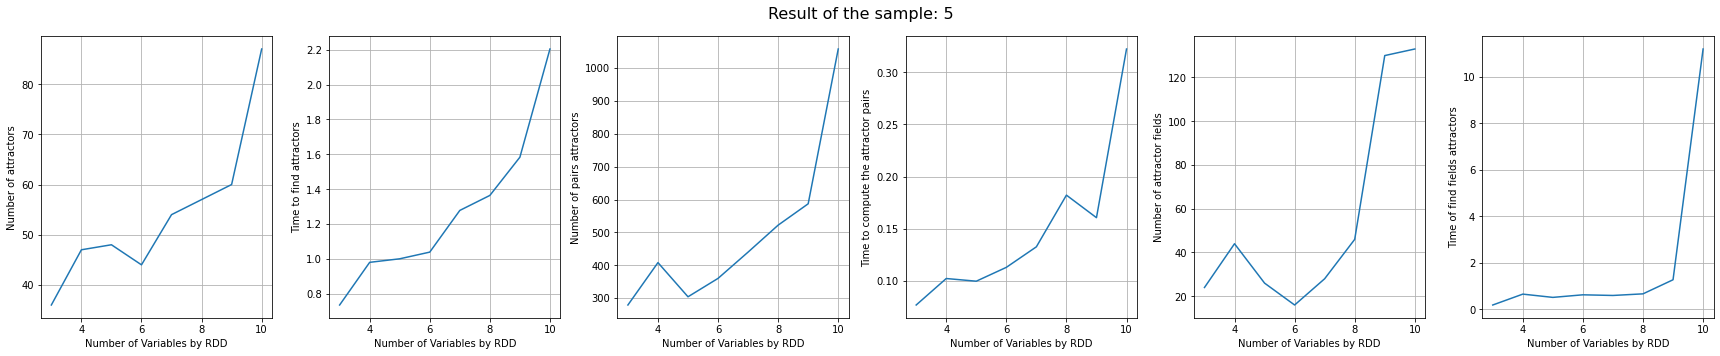

In [2]:
l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[5:]):
        ax.plot(group['n_variables'], group[key])
        ax.set_xlabel('Number of Variables by RDD')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the sample: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

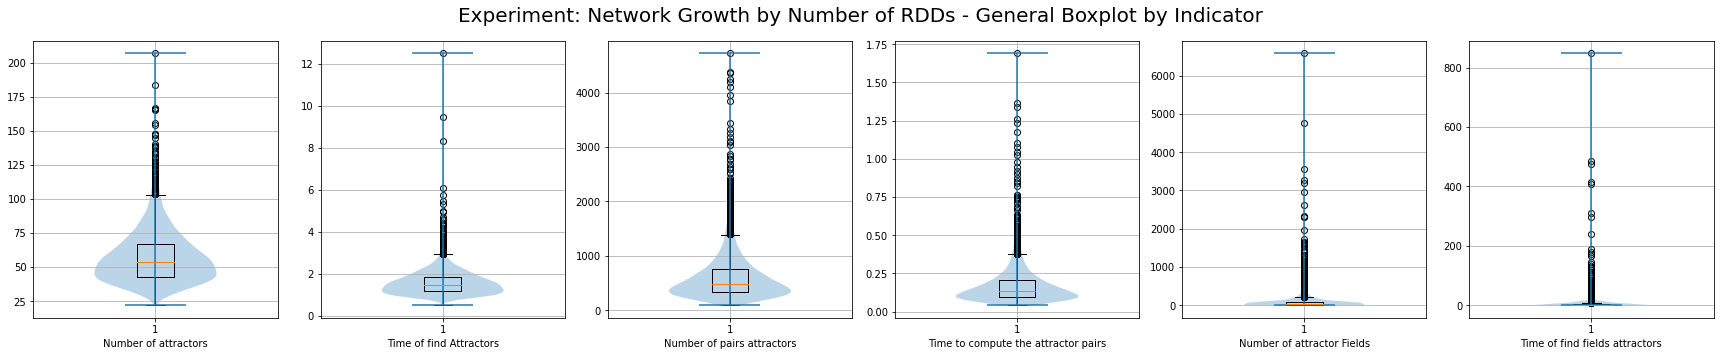

In [3]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,5))
cont_label = 0
for (key,ax) in zip(df.keys()[5:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Network Growth by Number of RDDs - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of variables

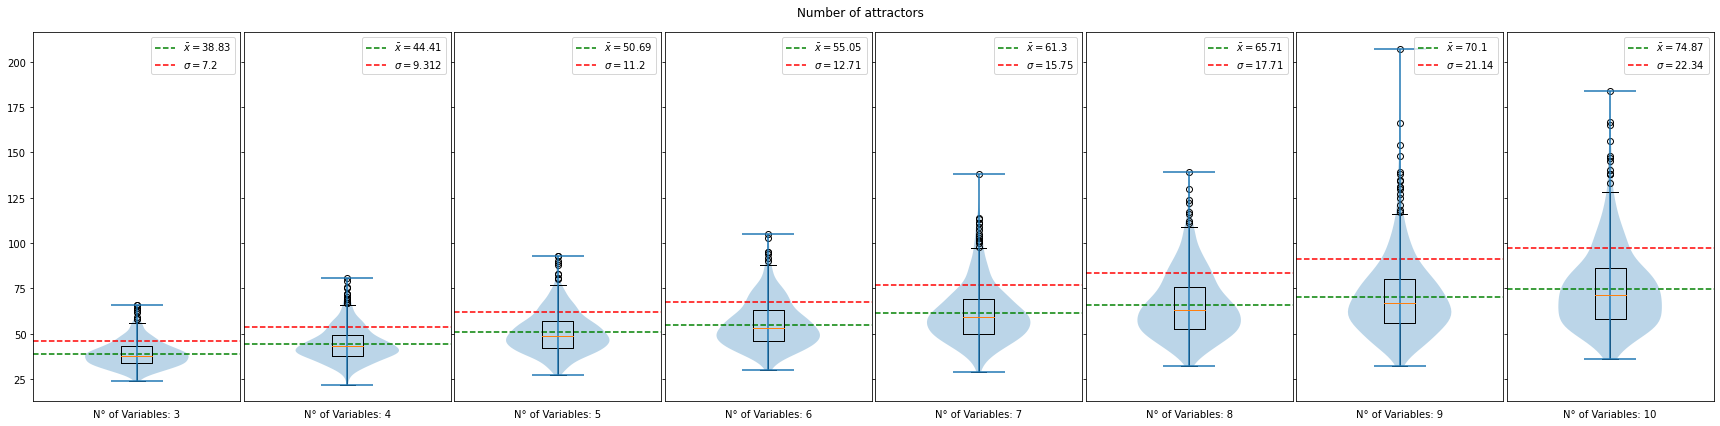

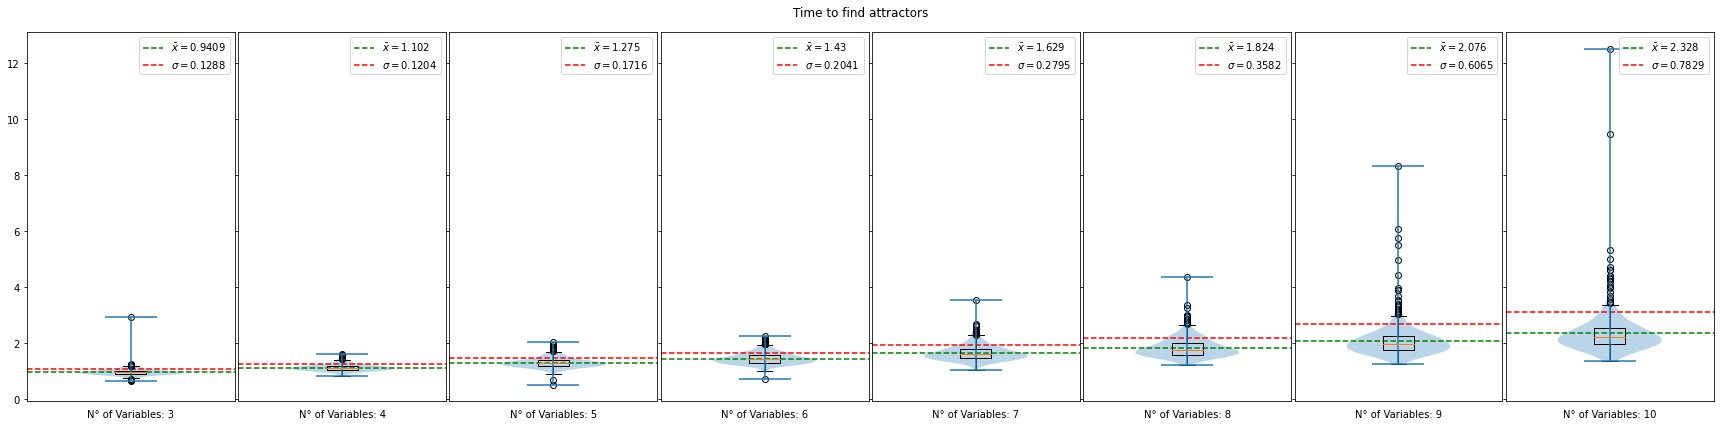

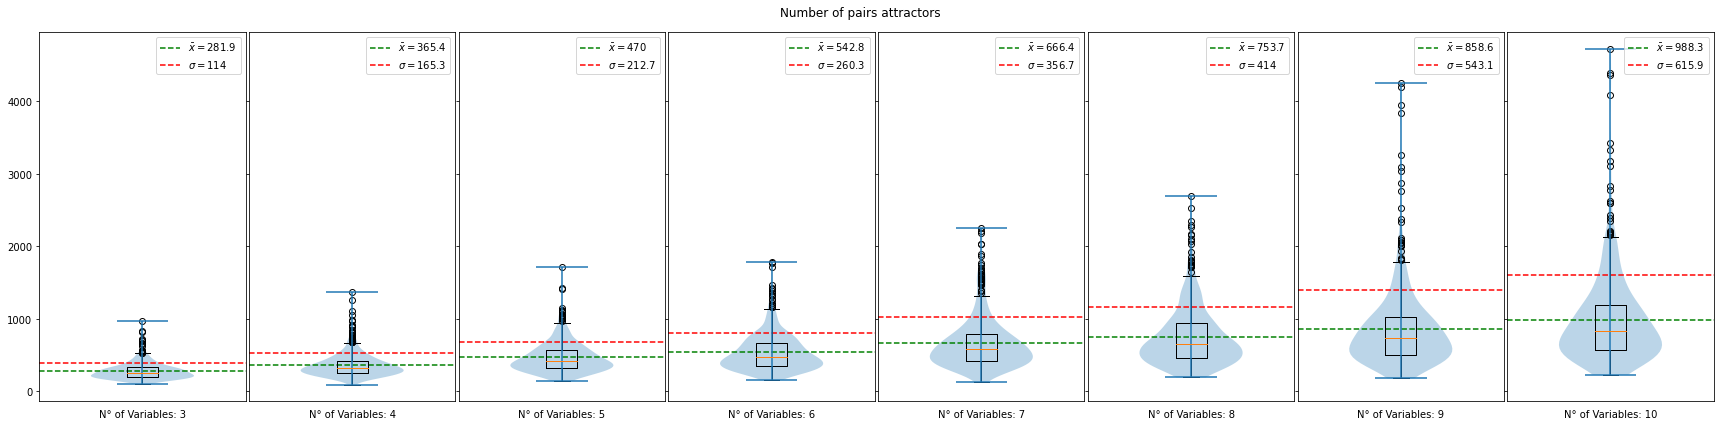

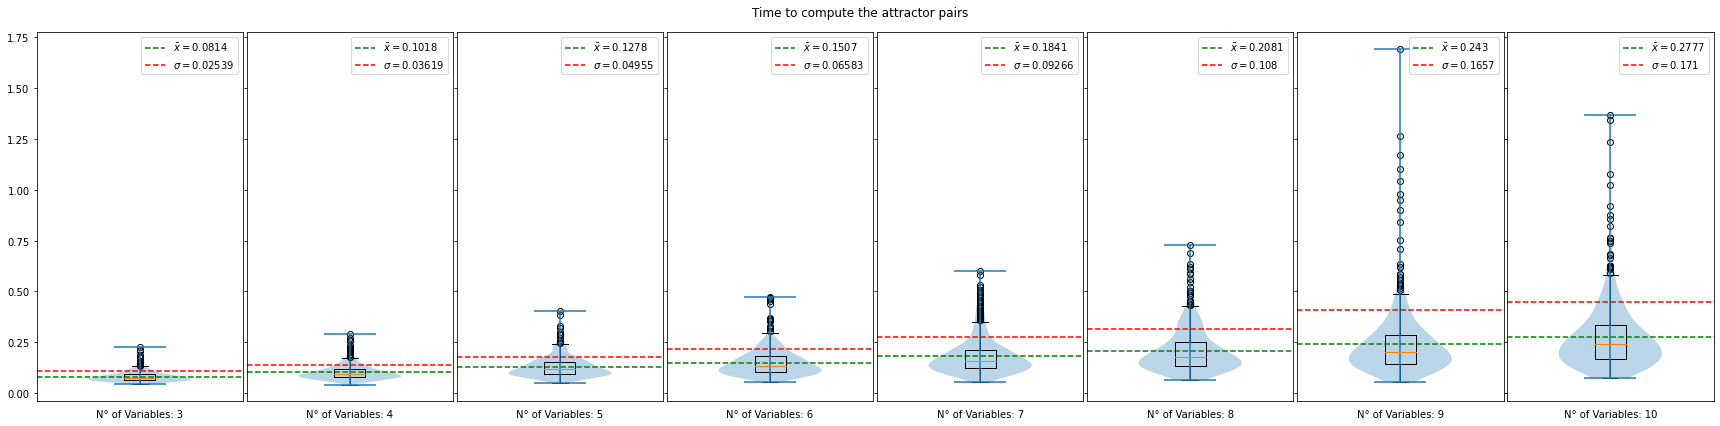

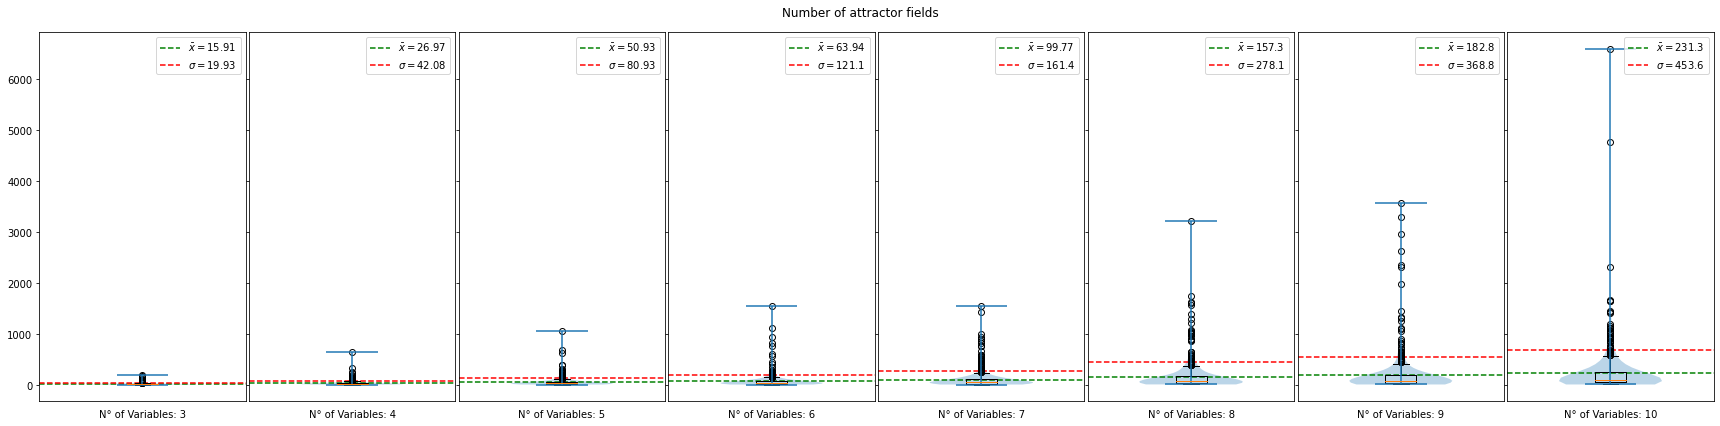

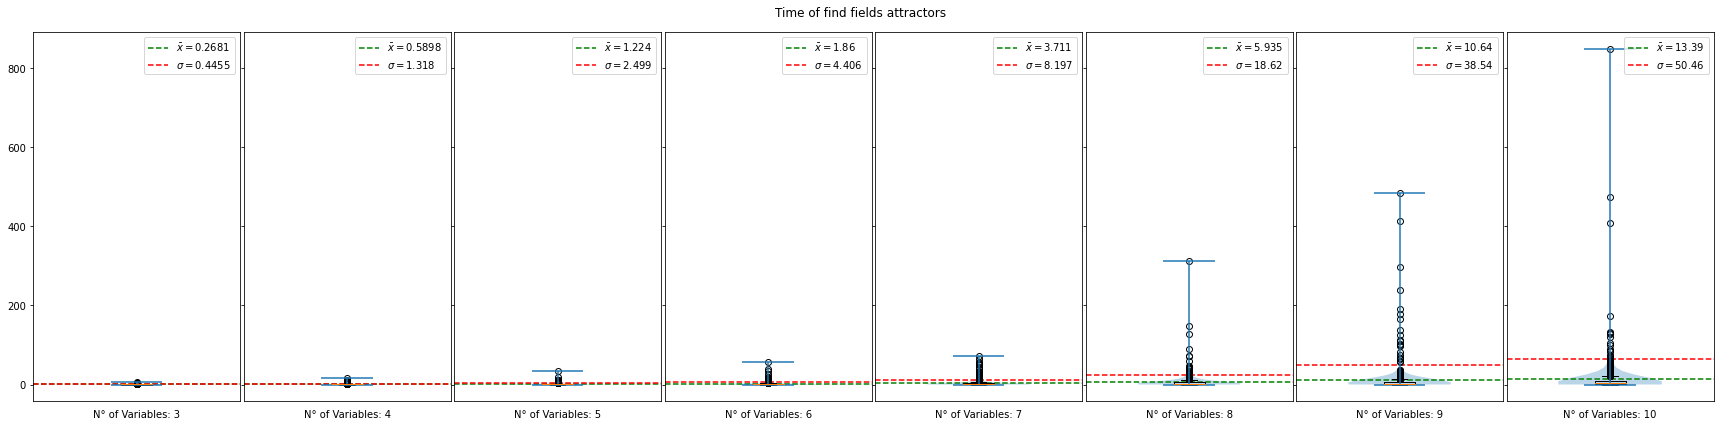

In [4]:
n_variables = df['n_variables'].unique()
labels = {key:label for key, label in zip(df.keys()[5:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[5:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_variables")

for key in df.keys()[5:]:
    fig, axs = plt.subplots(1, n_variables.size, figsize=(n_variables.size*3,6), sharey=True)
    for ax, n_variable in zip(axs, n_variables):
        group = grouped.get_group(n_variable)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        #if log_scale[key]:
        #ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Variables: {n_variable}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)